In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_excel('Weekly Production Summary.xlsx', sheet_name=2)
df.head()

,Week Name,Employee ID,Hours Worked,Units Produced,Quality Issues,Production Cost (₦),Overtime Hours,Training Hours,Rig Location
0,Week 3,1,42,570,1,550000,6,3,Brass
1,Week 3,2,44,510,4,540000,4,2,Brass
2,Week 3,3,40,459,5,550000,3,1,Brass
3,Week 3,4,50,573,4,510000,5,1,Nembe
4,Week 3,5,52,663,2,500000,7,3,Ekeremor


#  Weekly Production Analysis

In [83]:
# Total units produced per week by each rig location
weekly_production = df.groupby(['Week Name', 'Rig Location'])['Units Produced'].sum().reset_index()

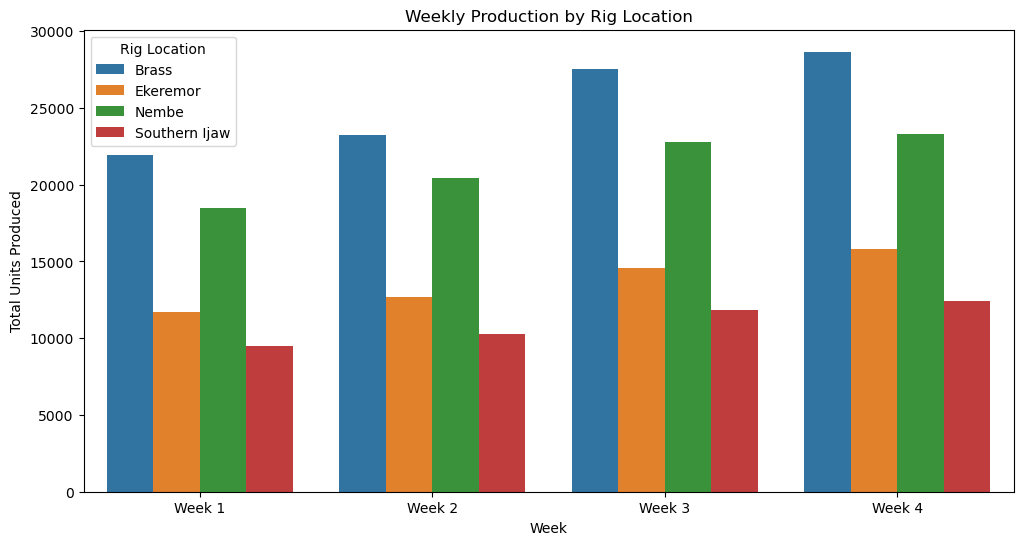

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_production, x='Week Name', y='Units Produced', hue='Rig Location')
plt.title('Weekly Production by Rig Location')
plt.ylabel('Total Units Produced')
plt.xlabel('Week')
plt.legend(title='Rig Location')
plt.show()

# Average Work Hours Analysis

In [86]:
# Average work hours by rig location
avg_work_hours = df.groupby('Rig Location')['Hours Worked'].mean().reset_index()

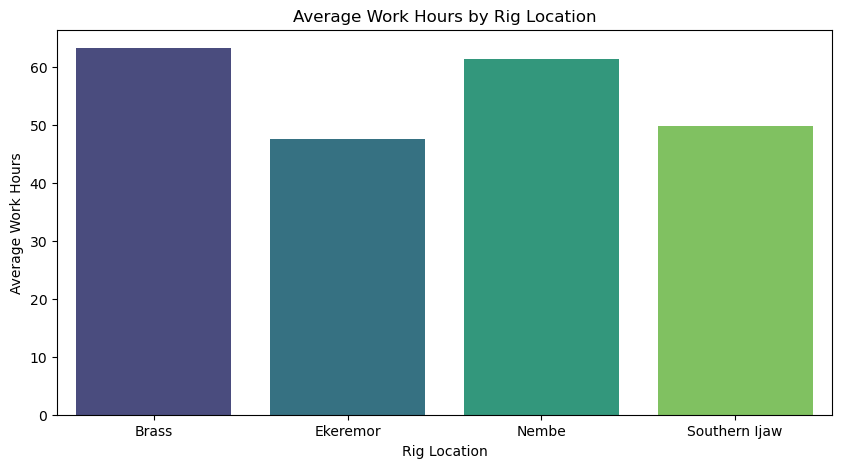

In [87]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_work_hours, x='Rig Location', y='Hours Worked', palette='viridis')
plt.title('Average Work Hours by Rig Location')
plt.ylabel('Average Work Hours')
plt.xlabel('Rig Location')
plt.show()

# Cost Analysis

In [89]:
# Average cost per unit by rig location
df['Cost per Unit'] = df['Production Cost (₦)'] / df['Units Produced']
avg_cost_per_unit = df.groupby('Rig Location')['Cost per Unit'].mean().reset_index()

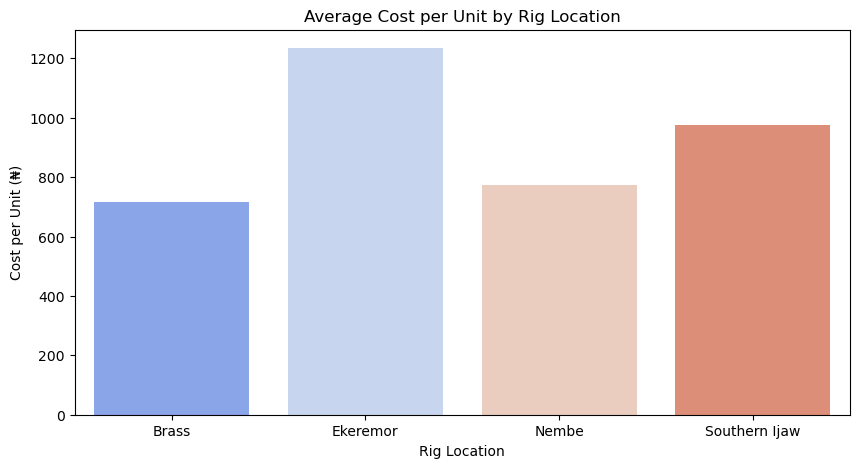

In [90]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_cost_per_unit, x='Rig Location', y='Cost per Unit', palette='coolwarm')
plt.title('Average Cost per Unit by Rig Location')
plt.ylabel('Cost per Unit (₦)')
plt.xlabel('Rig Location')
plt.show()

# Quality Control Analysis

In [92]:
# Quality rate (issues per unit) and average training hours by rig location
df['Quality Rate'] = df['Quality Issues'] / df['Units Produced']
quality_control = df.groupby('Rig Location').agg({'Quality Rate': 'mean', 'Training Hours': 'mean'}).reset_index()

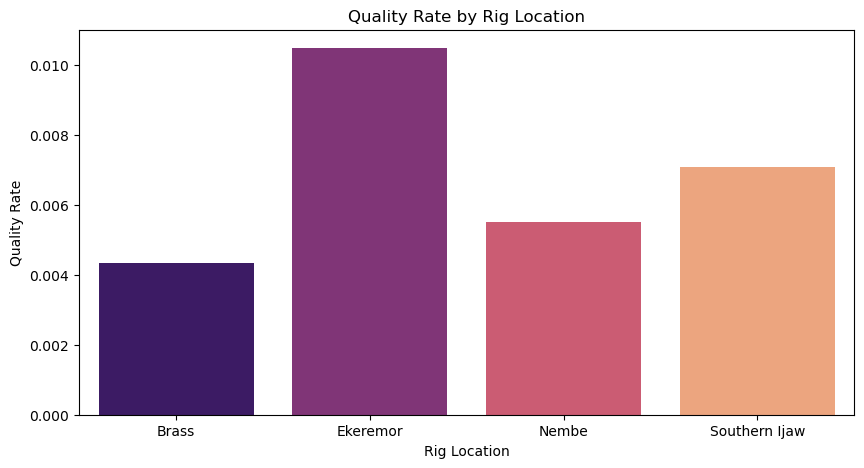

In [93]:
# Plot Quality Rate
plt.figure(figsize=(10, 5))
sns.barplot(data=quality_control, x='Rig Location', y='Quality Rate', palette='magma')
plt.title('Quality Rate by Rig Location')
plt.ylabel('Quality Rate')
plt.xlabel('Rig Location')
plt.show()

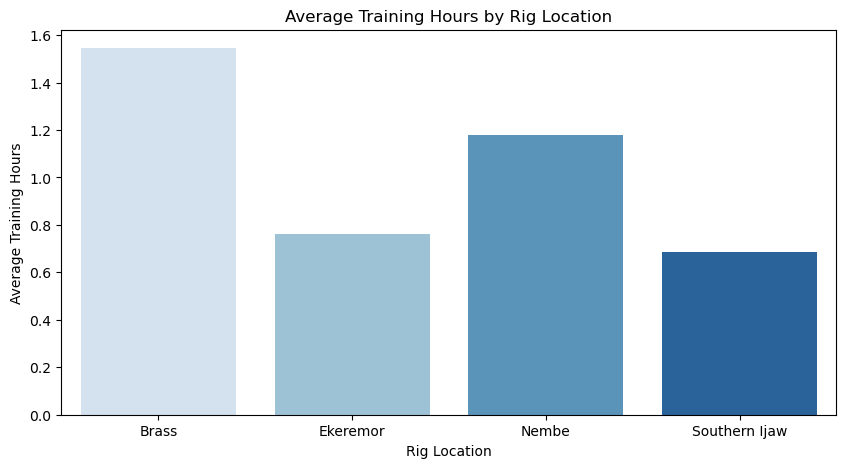

In [94]:
# Plot Average Training Hours
plt.figure(figsize=(10, 5))
sns.barplot(data=quality_control, x='Rig Location', y='Training Hours', palette='Blues')
plt.title('Average Training Hours by Rig Location')
plt.ylabel('Average Training Hours')
plt.xlabel('Rig Location')
plt.show()

# Units Produced per Hour by Rig Location

In [96]:
# Units produced per hour by rig location
df['Units per Hour'] = df['Units Produced'] / df['Hours Worked']
units_per_hour = df.groupby('Rig Location')['Units per Hour'].mean().reset_index()

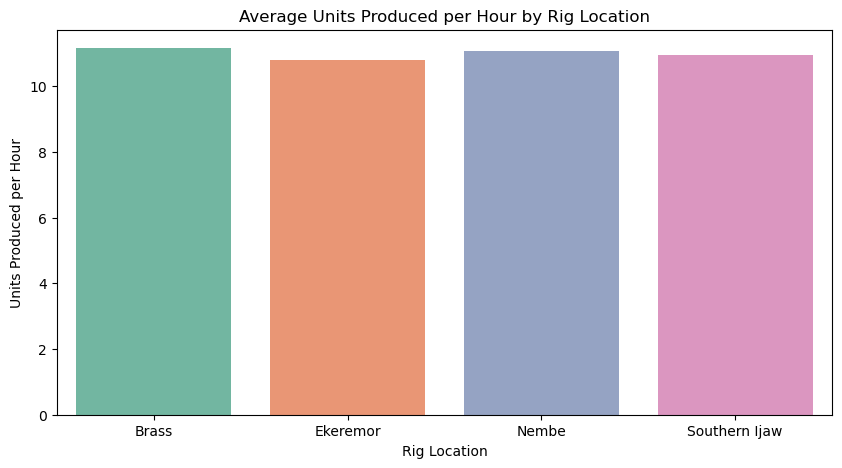

In [97]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=units_per_hour, x='Rig Location', y='Units per Hour', palette='Set2')
plt.title('Average Units Produced per Hour by Rig Location')
plt.ylabel('Units Produced per Hour')
plt.xlabel('Rig Location')
plt.show()

# Correlation Analysis

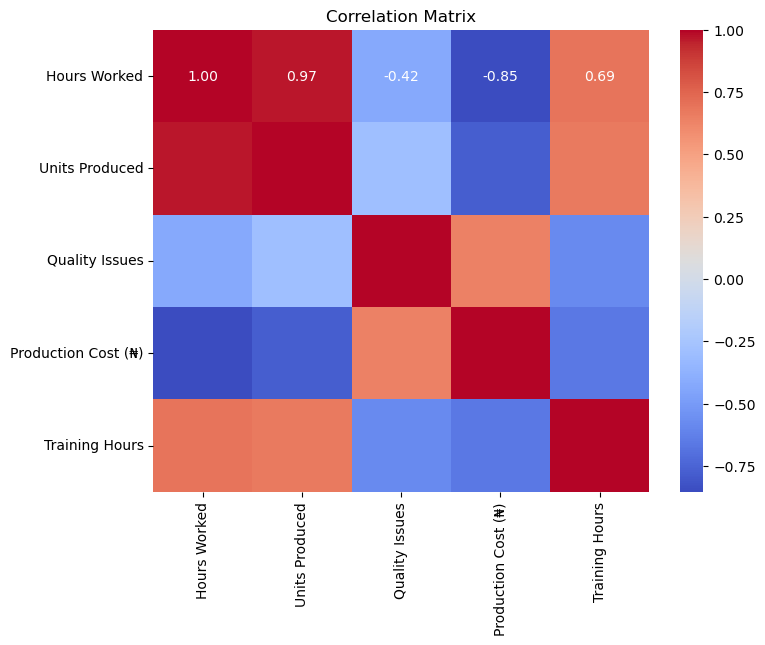

In [99]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Hours Worked', 'Units Produced', 'Quality Issues', 'Production Cost (₦)', 'Training Hours']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Efficiency Metrics: Units Produced per Hour vs. Hours Worked

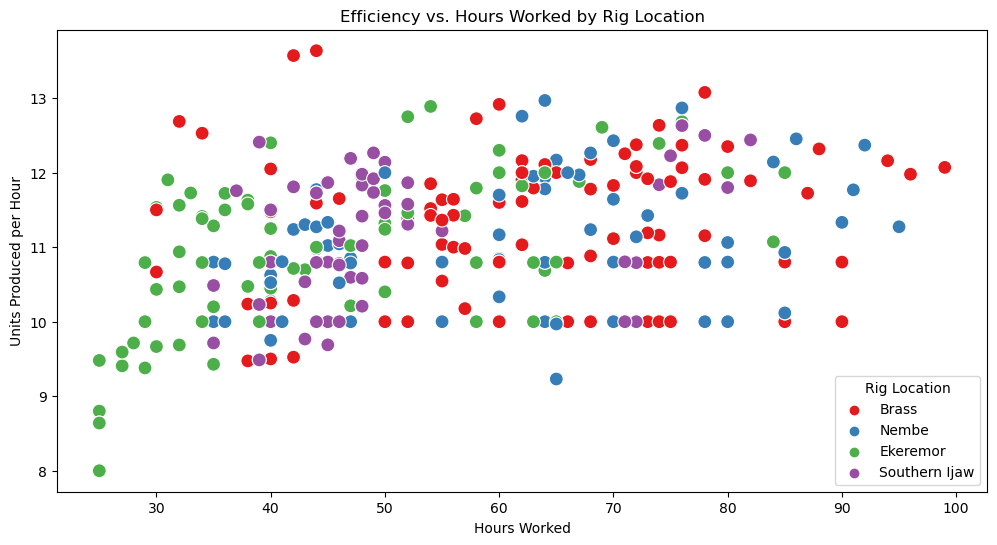

In [101]:
# Units per hour by work hour categories
df['Efficiency (Units per Hour)'] = df['Units Produced'] / df['Hours Worked']
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hours Worked', y='Efficiency (Units per Hour)', hue='Rig Location', palette='Set1', s=100)
plt.title('Efficiency vs. Hours Worked by Rig Location')
plt.xlabel('Hours Worked')
plt.ylabel('Units Produced per Hour')
plt.legend(title='Rig Location')
plt.show()


# Weekly Production Trend per Rig Location

In [103]:
# Total units produced each week per location
weekly_trends = df.groupby(['Week Name', 'Rig Location'])['Units Produced'].sum().reset_index()

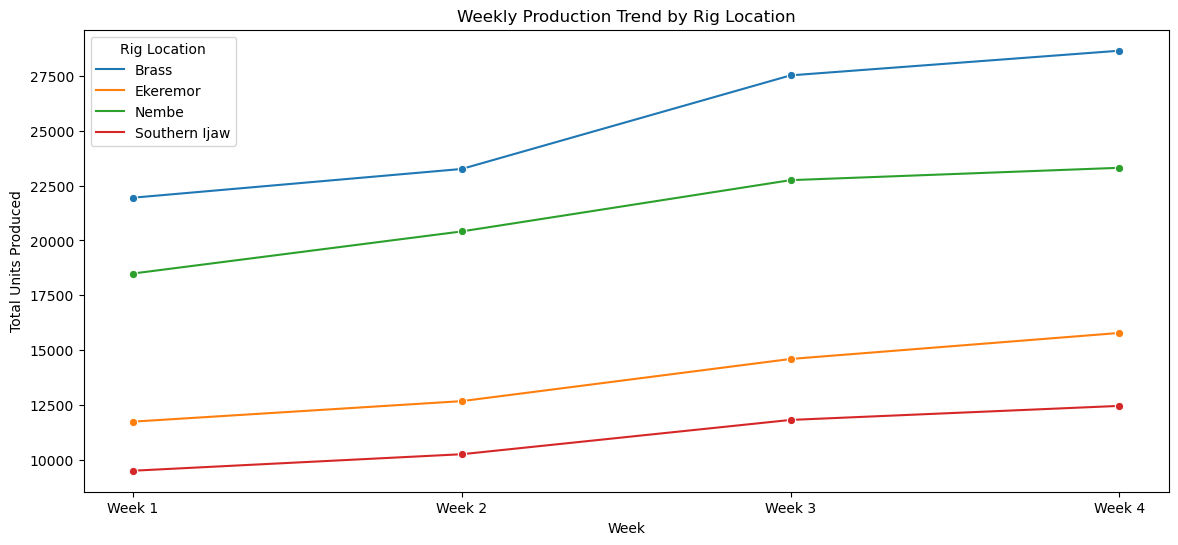

In [104]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_trends, x='Week Name', y='Units Produced', hue='Rig Location', marker='o', palette='tab10')
plt.title('Weekly Production Trend by Rig Location')
plt.ylabel('Total Units Produced')
plt.xlabel('Week')
plt.legend(title='Rig Location')
plt.show()

# Cost Efficiency: Cost per Unit and Production Cost by Rig Location

In [106]:
# Calculate average cost per unit
df['Cost per Unit'] = df['Production Cost (₦)'] / df['Units Produced']
cost_analysis = df.groupby('Rig Location').agg({'Production Cost (₦)': 'sum', 'Cost per Unit': 'mean'}).reset_index()

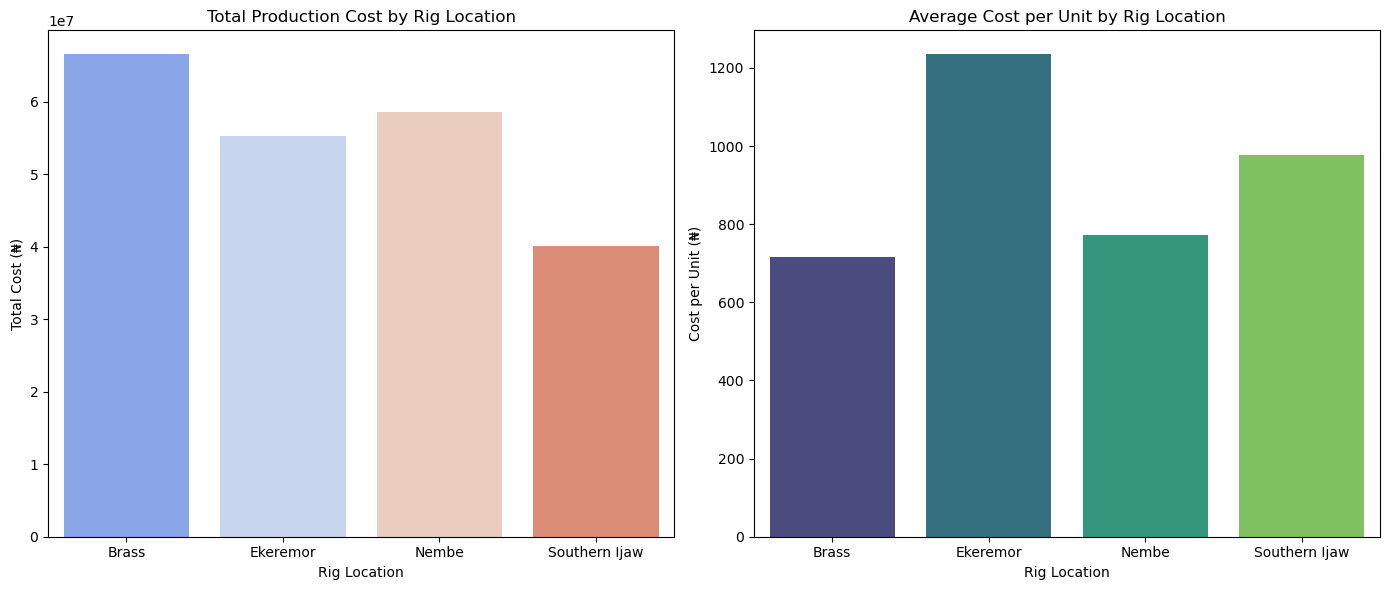

In [107]:
# Plot Production Cost and Cost per Unit
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=cost_analysis, x='Rig Location', y='Production Cost (₦)', palette='coolwarm', ax=ax[0])
ax[0].set_title('Total Production Cost by Rig Location')
ax[0].set_ylabel('Total Cost (₦)')

sns.barplot(data=cost_analysis, x='Rig Location', y='Cost per Unit', palette='viridis', ax=ax[1])
ax[1].set_title('Average Cost per Unit by Rig Location')
ax[1].set_ylabel('Cost per Unit (₦)')

plt.tight_layout()
plt.show()

# Quality and Training Analysis

In [109]:
# Calculate Quality Rate
df['Quality Rate'] = df['Quality Issues'] / df['Units Produced']
quality_training = df.groupby('Rig Location').agg({'Quality Rate': 'mean', 'Training Hours': 'mean'}).reset_index()

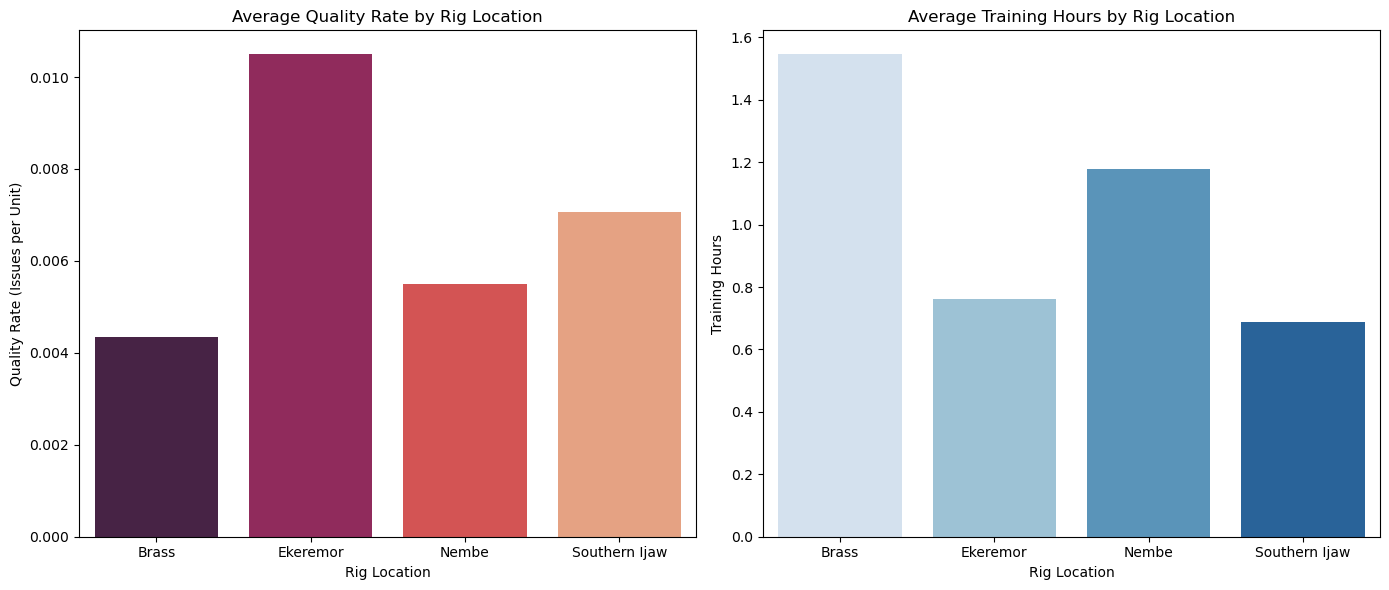

In [110]:
# Plot Quality Rate and Training Hours
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=quality_training, x='Rig Location', y='Quality Rate', palette='rocket', ax=ax[0])
ax[0].set_title('Average Quality Rate by Rig Location')
ax[0].set_ylabel('Quality Rate (Issues per Unit)')

sns.barplot(data=quality_training, x='Rig Location', y='Training Hours', palette='Blues', ax=ax[1])
ax[1].set_title('Average Training Hours by Rig Location')
ax[1].set_ylabel('Training Hours')

plt.tight_layout()
plt.show()

# Productivity Analysis: Units Produced vs. Quality Issues

In [112]:
# Total Units Produced vs. Quality Issues by Rig Location
productivity_quality = df.groupby('Rig Location').agg({'Units Produced': 'sum', 'Quality Issues': 'sum'}).reset_index()

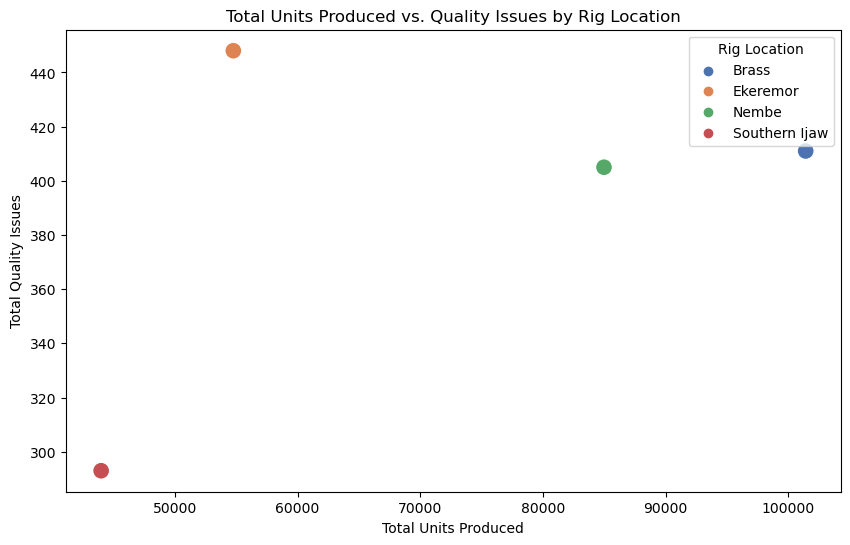

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=productivity_quality, x='Units Produced', y='Quality Issues', hue='Rig Location', s=150, palette='deep')
plt.title('Total Units Produced vs. Quality Issues by Rig Location')
plt.xlabel('Total Units Produced')
plt.ylabel('Total Quality Issues')
plt.legend(title='Rig Location')
plt.show()

# Overtime Impact Analysis

In [115]:
# Calculate the correlation between Overtime Hours and Units Produced/Quality Issues
overtime_impact = df.groupby('Rig Location').agg({
    'Overtime Hours': 'sum',
    'Units Produced': 'sum',
    'Quality Issues': 'sum'
}).reset_index()

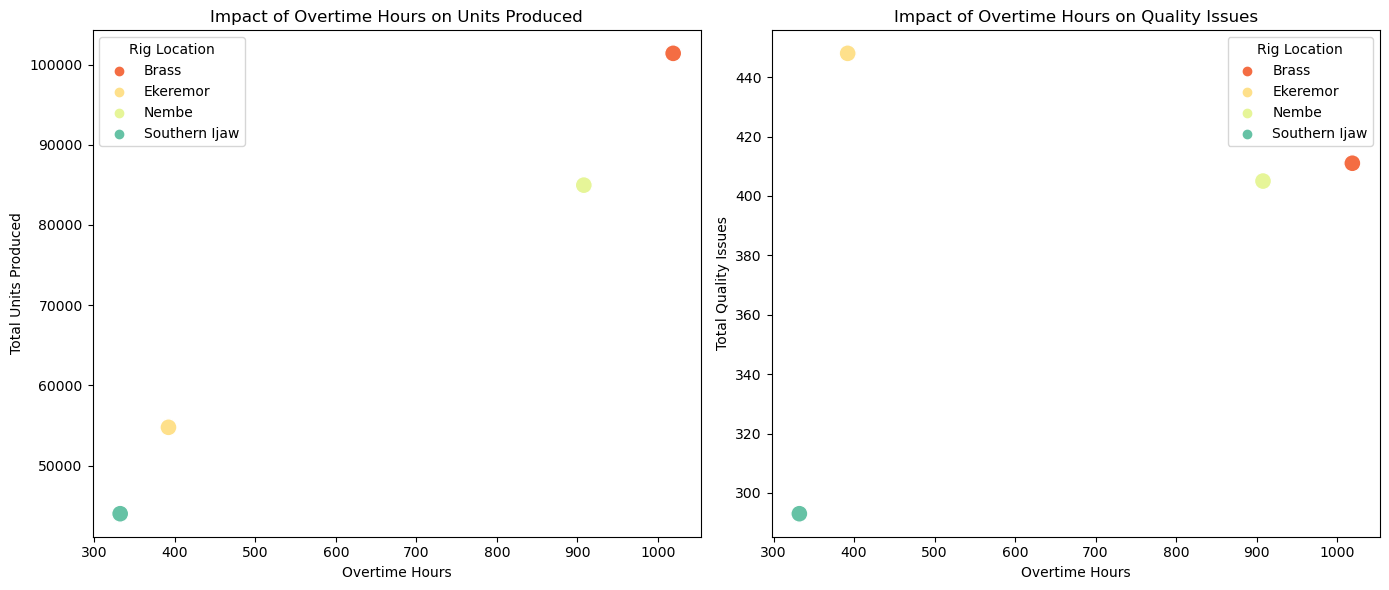

In [116]:
# Plotting Overtime Impact on Production and Quality
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=overtime_impact, x='Overtime Hours', y='Units Produced', hue='Rig Location', s=150, palette='Spectral', ax=ax[0])
ax[0].set_title('Impact of Overtime Hours on Units Produced')
ax[0].set_ylabel('Total Units Produced')
ax[0].set_xlabel('Overtime Hours')

sns.scatterplot(data=overtime_impact, x='Overtime Hours', y='Quality Issues', hue='Rig Location', s=150, palette='Spectral', ax=ax[1])
ax[1].set_title('Impact of Overtime Hours on Quality Issues')
ax[1].set_ylabel('Total Quality Issues')
ax[1].set_xlabel('Overtime Hours')

plt.tight_layout()
plt.show()

# Comparative Analysis Across Weeks

In [118]:
# Group by Week and Rig Location to calculate efficiency, quality rate, and cost per unit
weekly_comparison = df.groupby(['Week Name', 'Rig Location']).agg({
    'Efficiency (Units per Hour)': 'mean',
    'Quality Rate': 'mean',
    'Cost per Unit': 'mean'
}).reset_index()

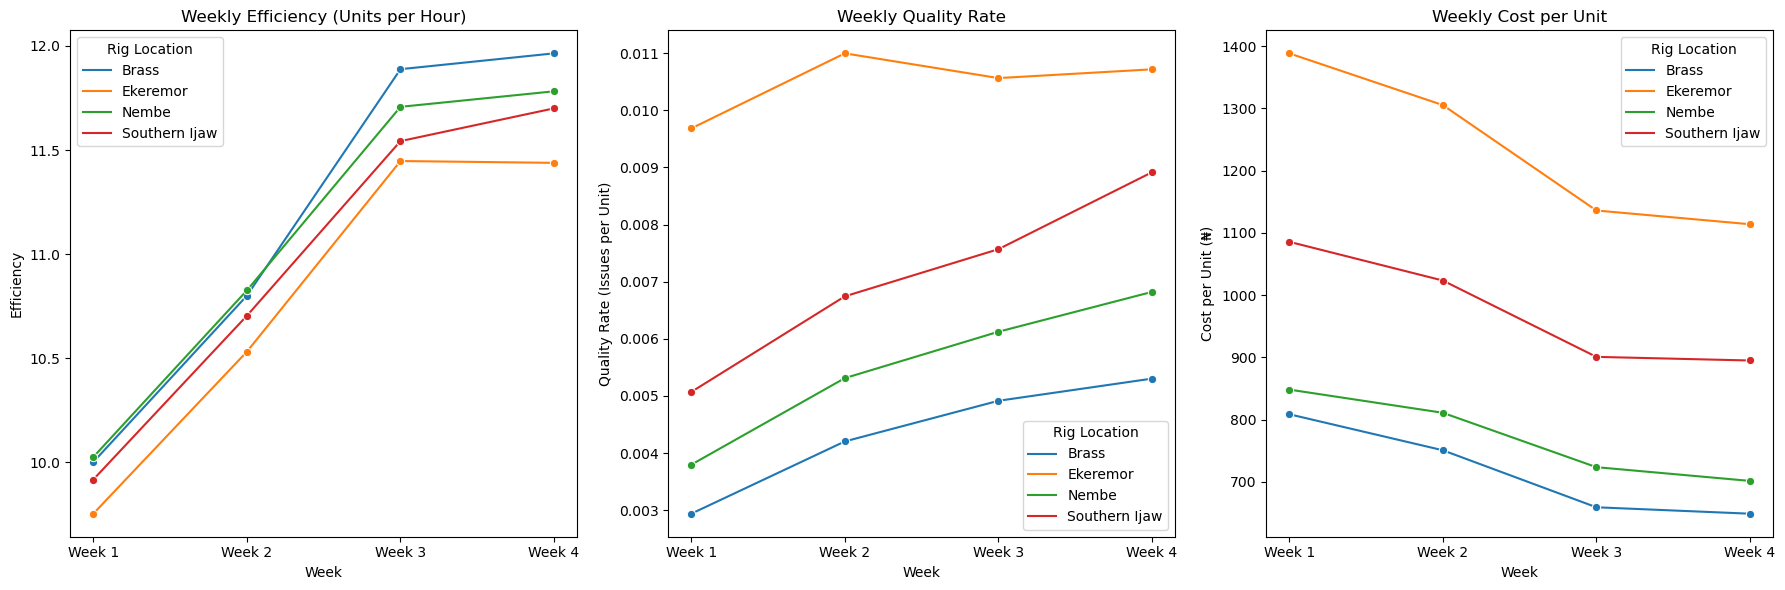

In [119]:
# Plotting weekly comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.lineplot(data=weekly_comparison, x='Week Name', y='Efficiency (Units per Hour)', hue='Rig Location', marker='o', ax=ax[0])
ax[0].set_title('Weekly Efficiency (Units per Hour)')
ax[0].set_ylabel('Efficiency')
ax[0].set_xlabel('Week')

sns.lineplot(data=weekly_comparison, x='Week Name', y='Quality Rate', hue='Rig Location', marker='o', ax=ax[1])
ax[1].set_title('Weekly Quality Rate')
ax[1].set_ylabel('Quality Rate (Issues per Unit)')
ax[1].set_xlabel('Week')

sns.lineplot(data=weekly_comparison, x='Week Name', y='Cost per Unit', hue='Rig Location', marker='o', ax=ax[2])
ax[2].set_title('Weekly Cost per Unit')
ax[2].set_ylabel('Cost per Unit (₦)')
ax[2].set_xlabel('Week')

plt.tight_layout()
plt.show()